<a href="https://colab.research.google.com/github/rafiaw01/M598---Thesis/blob/main/Thesis_PDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Master Thesis - Predictive Maintenance Dataset**


**Name =                Awais Rafi**
**Student Id =          GH1024169**

**Thesis Supervisor =              Dr Sami Alsalamin**

**Submitted On =                   July 11 - 2025**


Official DataSet is found at :
https://data.nasa.gov/dataset/c-mapss-aircraft-engine-simulator-data

Publicly Available Dataset is found at : https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/data

**Once the Dataset Has been decided the next step isto Import the necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
import sklearn

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import tensorflow as tf

import os

from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')

#**Data Processing**

**Once the Important Libraries have been Imported then the columns have to be assigned as the data itself is raw and doesnt carry column Names**

In [ ]:
indexing_name = ['Engine Id' , 'Cycles']
setting_id = ['setting 1','setting 2','setting 3']
sensor_name = ['s-{}'.format(i+1) for i in range(0,21)]
column = indexing_name + setting_id + sensor_name


**The data is assigned as train and valid and actual dataframes -  train dataframe is for training the ML model , valid/testing  dataframe is for testing and y_actual contains the real truth Remaining Usefull Life (RUL)**

**The Dataset is clean so Data Cleaning processes such as Searching for NULL values will be skipped in the ML Pipeline**

In [ ]:
df_train = pd.read_csv('/content/train_FD001.txt',sep='\s+',header=None,index_col=False,names=column)
df_valid = pd.read_csv('/content/test_FD001.txt',sep='\s+',header=None,index_col=False,names=column)
y_actual = pd.read_csv('/content/RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])



In [ ]:
train_set = df_train.copy()
valid_set = df_valid.copy()

**To Assist in understanding the data data visulization techniques have to be used such as below to understand data spread**

**The following code is for the Gas Turbine Engine Lifetime Cycle with respect to Engine Id**

In [ ]:
train_set

,Engine Id,Cycles,setting 1,setting 2,setting 3,s-1,s-2,s-3,s-4,s-5,...,s-12,s-13,s-14,s-15,s-16,s-17,s-18,s-19,s-20,s-21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [ ]:
valid_set

,Engine Id,Cycles,setting 1,setting 2,setting 3,s-1,s-2,s-3,s-4,s-5,...,s-12,s-13,s-14,s-15,s-16,s-17,s-18,s-19,s-20,s-21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [ ]:
print("Shape of the train set is : ", df_train.shape )
print("Shape of the valid set is : ", df_valid.shape )

Shape of the train set is :  (20631, 26)
Shape of the valid set is :  (13096, 26)


**Data Visualization is necessary to understand the spread of the data**

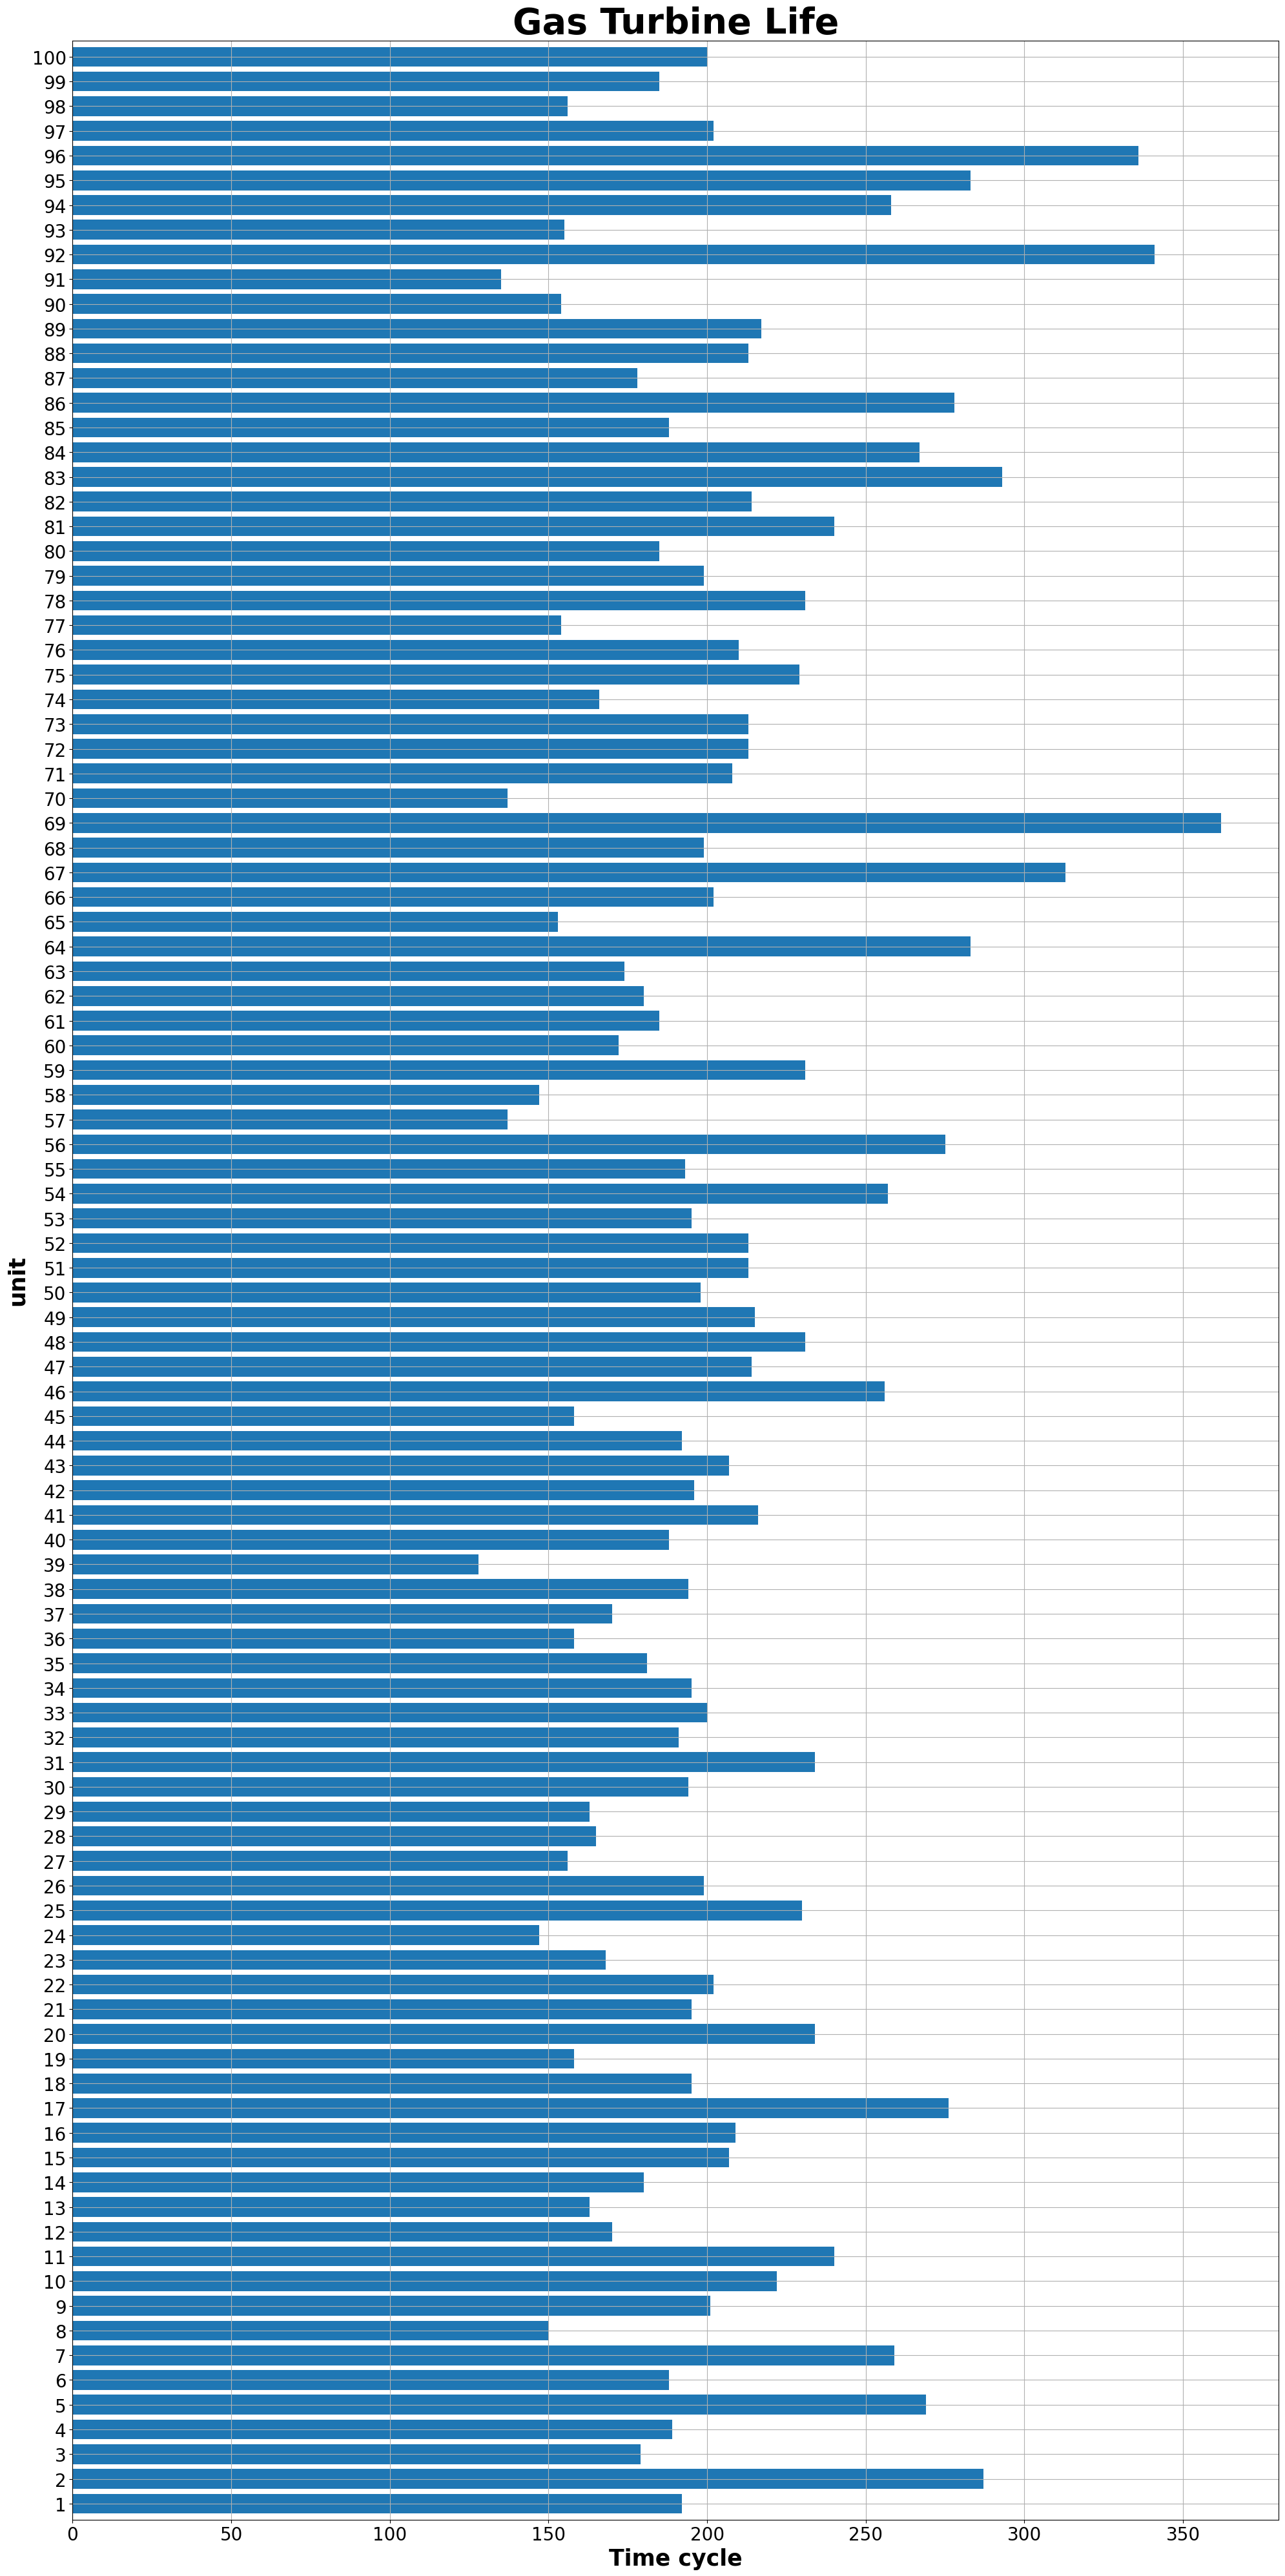

In [ ]:
max_cycle = train_set[indexing_name].groupby('Engine Id').max()
plt.figure(figsize=(20,40))

ax= max_cycle['Cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')

plt.title('Gas Turbine Life',fontweight='bold',size=40)
plt.xlabel('Time cycle',fontweight='bold',size=25)

plt.xticks(size=20)
plt.ylabel('unit',fontweight='bold',size=25)

plt.yticks(size=20)
plt.grid(True)

plt.tight_layout()
plt.show()

**The following line of code appends Remaining Useful life data onto main dataframe as RUL is not present within the same dataset**

In [ ]:
def RUL_column(df):
    train_by_unit = df.groupby(by='Engine Id')
    max_cycles = train_by_unit['Cycles'].max()
    merged = df.merge(max_cycles.to_frame(name='max_cycle'), left_on='Engine Id',right_index=True)
    merged["RUL"] = merged["max_cycle"] - merged['Cycles']
    merged = merged.drop("max_cycle", axis=1)
    return merged

In [ ]:
train_set = RUL_column(train_set)

**The following is a correlation matrix which is very helpful in understanding relationship between several parameters in the dataset**

<Axes: >

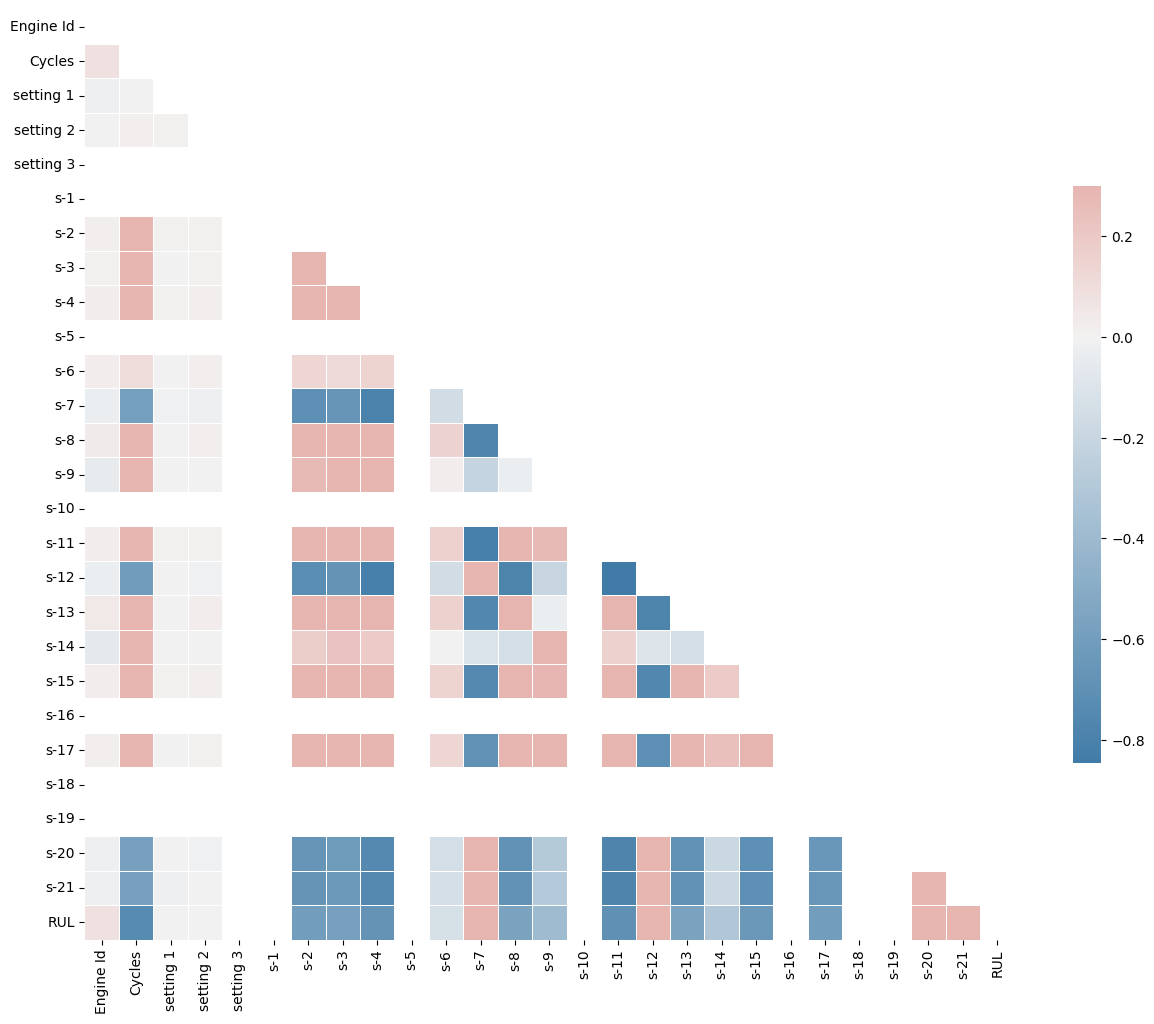

In [ ]:
correlation_chart = train_set.corr()

mask = np.triu(np.ones_like(correlation_chart, dtype=bool))

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(240, 15, as_cmap=True)

sns.heatmap(correlation_chart, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

**The following are Important Definitionlabels about the real meaning of the data that is being worked with as sensor readings without proper headings is useless**

In [ ]:
Sensor_Definition={}
Definition_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in Definition_list :
    Sensor_Definition['s-'+str(i)]=x
    i+=1
Sensor_Definition

{'s-1': '(Fan inlet temperature) (◦R)',
 's-2': '(LPC outlet temperature) (◦R)',
 's-3': '(HPC outlet temperature) (◦R)',
 's-4': '(LPT outlet temperature) (◦R)',
 's-5': '(Fan inlet Pressure) (psia)',
 's-6': '(bypass-duct pressure) (psia)',
 's-7': '(HPC outlet pressure) (psia)',
 's-8': '(Physical fan speed) (rpm)',
 's-9': '(Physical core speed) (rpm)',
 's-10': '(Engine pressure ratio(P50/P2)',
 's-11': '(HPC outlet Static pressure) (psia)',
 's-12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's-13': '(Corrected fan speed) (rpm)',
 's-14': '(Corrected core speed) (rpm)',
 's-15': '(Bypass Ratio) ',
 's-16': '(Burner fuel-air ratio)',
 's-17': '(Bleed Enthalpy)',
 's-18': '(Required fan speed)',
 's-19': '(Required fan conversion speed)',
 's-20': '(High-pressure turbines Cool air flow)',
 's-21': '(Low-pressure turbines Cool air flow)'}

**The next step isto Drop certain unimportant feautures such as lavels and settings to prepare ML pipeline**

In [ ]:
from sklearn.model_selection import train_test_split

dropping_labels = indexing_name + setting_id

X_train=train_set.drop(columns=dropping_labels).copy()

X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.4, random_state=40)

**The data has to be scaled the reason being that the data spread has to be scaled on the Min and Max**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)


X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)


X_valid = valid_set.groupby('Engine Id').last().reset_index().drop(columns=dropping_labels)


X_valid_s=scaler.fit_transform(X_valid)

**The following code clearly Identifies irrelevant sensors that are adding noise to the dataset - The purpose is to visualize the dataspread, to point out outlier or anamolies in the dataset , to check for data skewness and to prepapre data for further ML processing**

array([[<Axes: title={'center': 's-2'}>, <Axes: title={'center': 's-3'}>,
        <Axes: title={'center': 's-4'}>, <Axes: title={'center': 's-7'}>],
       [<Axes: title={'center': 's-8'}>, <Axes: title={'center': 's-9'}>,
        <Axes: title={'center': 's-11'}>,
        <Axes: title={'center': 's-12'}>],
       [<Axes: title={'center': 's-13'}>,
        <Axes: title={'center': 's-14'}>,
        <Axes: title={'center': 's-15'}>,
        <Axes: title={'center': 's-17'}>],
       [<Axes: title={'center': 's-20'}>,
        <Axes: title={'center': 's-21'}>, <Axes: >, <Axes: >]],
      dtype=object)

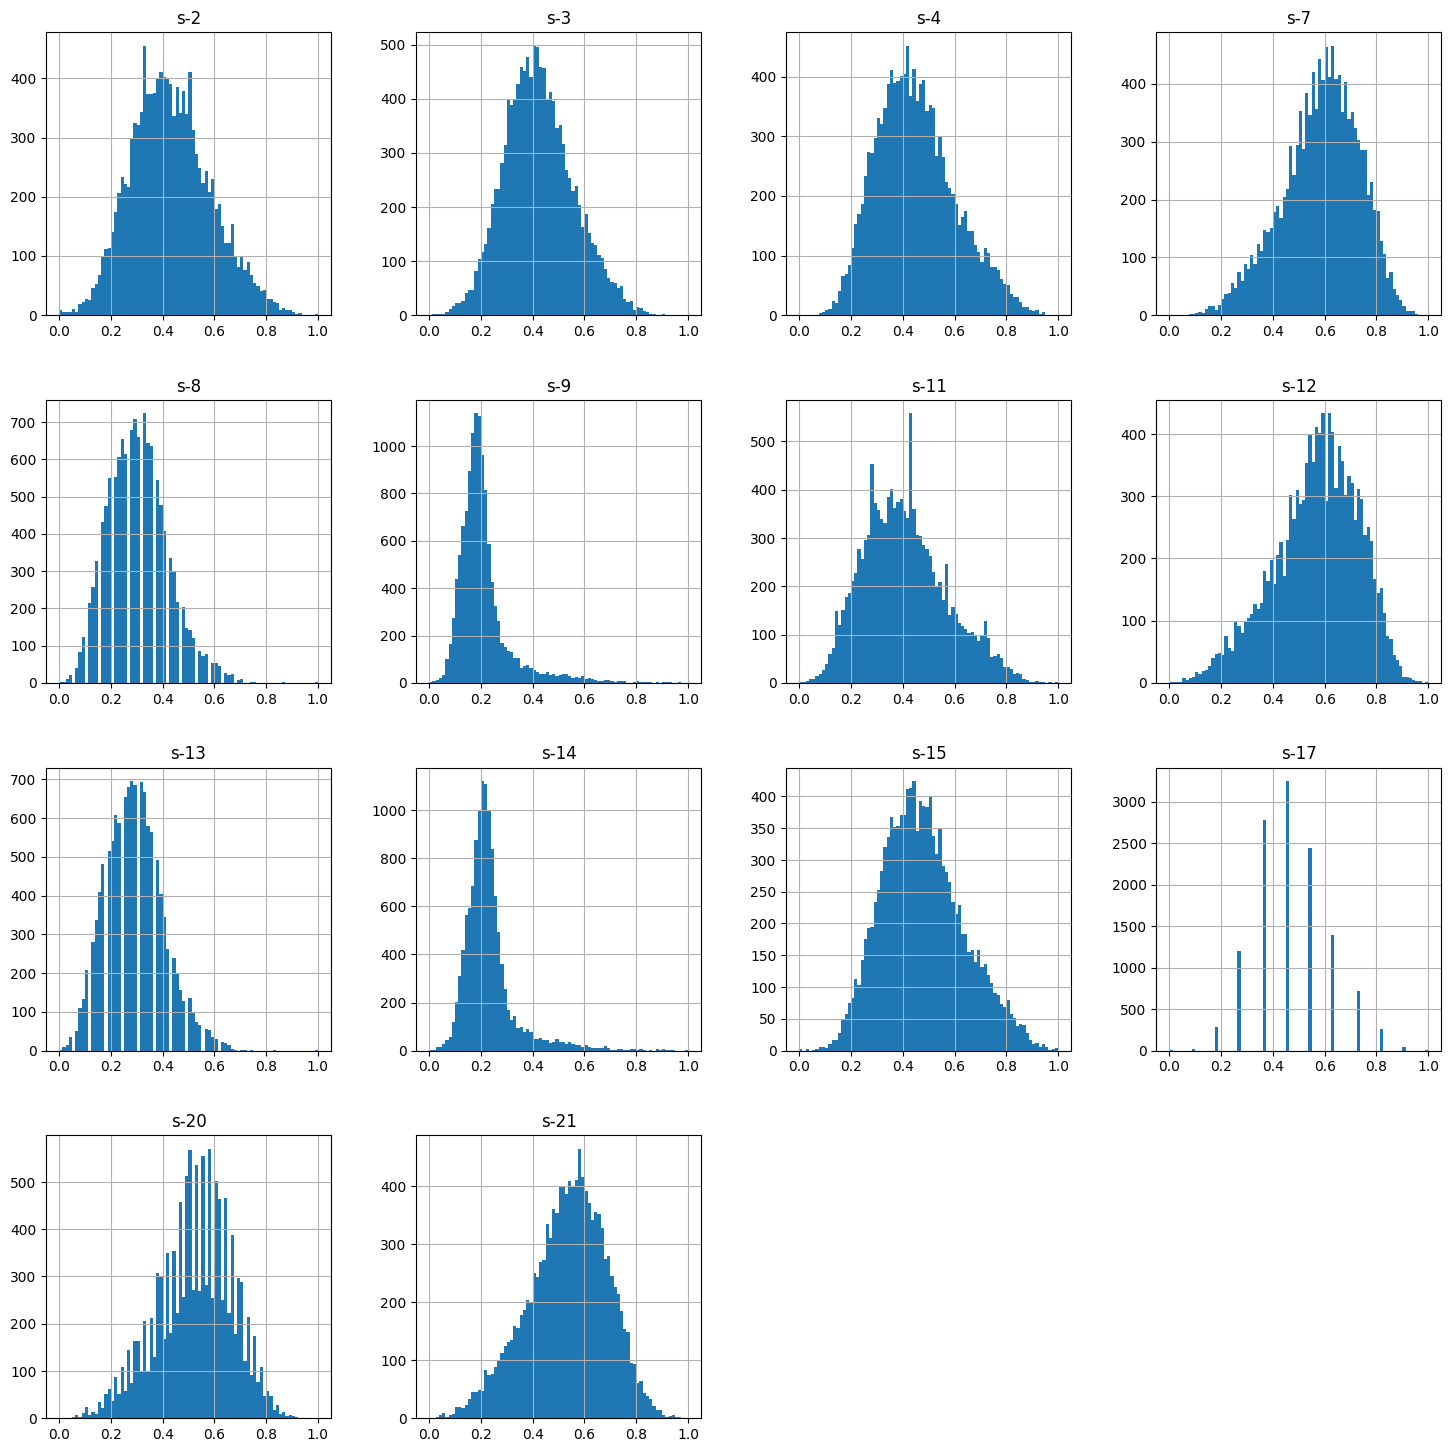

In [ ]:
sensor_names=['s-{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(X_train_s,columns=['s-{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=80, figsize=(18,18))

**Once Data Visualization is done then comes building the ML pipeline Initially linear regression is carried out followed by Support vector regression**

**Linear Regression**

In [ ]:
class Linear_Regrssn() :
    def __init__( self, lr=0.01, iterations=140 ) :
        self.lr = lr
        self.iterations = iterations
    def fit( self, X, Y ) :
        self.l, self.p = X.shape

        # Adding weight for Initialization
        # which is effectively self.w that is the size of Input variables

        self.W = np.zeros( self.p )
        self.b = 0
        self.X = X
        self.Y = Y


        # Using Gradient Learning
        #The purpose is to perform a loop and repeatedly make useful predictions based on the above parameters
        for i in range( self.iterations ) :
            self.weight_updtr()
        return self


    # The purpose of the weight_updtr is to calculate the deviation of the model
    # and the weight assists in determing the direction of the model and and reduce error and is controlled by the learning rate as specified earlier

    def weight_updtr( self ) :
        Y_pred = self.predict( self.X )

        #  Chosing the Gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.l
        db = - 2 * np.sum( self.Y - Y_pred ) / self.l

        # Checking with new weights
        self.b = self.b - self.lr * db
        self.W = self.W - self.lr * dW
        return self

    def predict( self, X ) :
          # using the traditional y = mx + c gradient mathametical equation
        return X.dot( self.W ) + self.b

**Using Support Vector Alogirthm**

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

# rbf stands for Radial Basis Kernel helps in learning
# data relationships that are not linear and the SVR can fit on data is
# is curvy and not limited to straigt lines or planes

In [ ]:
rf = RandomForestRegressor(max_features="sqrt", random_state=42)

# The purpose is to tune the ML model for Regression Model
# Results in a robust model and limits in overfitting

**Using mean squared and root mean square and Mean Absolute Error as well**

In [ ]:
def evaluate(y_true, y_hat, label='test'):
    mean_se = mean_squared_error(y_true, y_hat)
    root_mse = np.sqrt(mean_se)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, root_mse, variance))

    # The above line of Code carries out calculation of Regression Metrics
    # The metrics are R-Square , Root mean Squared and uses actual values and predicted values and compares them

**Plotting authentic data and data that is predicted to compare and develop and understanding**

In [ ]:
def plot_predict_actual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wdth= 0.5

    plt.figure(figsize=(80,35))
    truth_values = [int(x) for x in y_test.values]
    predict_values = list(y_test_hat)

    plt.bar(indices, truth_values, width=wdth,color='b', label='True RUL')
    plt.bar([i for i in indices], predict_values, width=0.5*wdth, color='r', alpha=0.6, label='Predict RUL')

    plt.legend(prop={'size': 50})
    plt.tick_params(labelsize=40)

    plt.show()

# The model provides a comparison between Predicted RUL and Actual RUL

**Now Considering that the above code has helped in understanding the data Working with Data and Technique Number - 01 Working with dataset with all the data parameters**

In [ ]:
y_valid = y_actual.copy()

#Linear Regression Model

lr = Linear_Regrssn()
lr.fit(X=X_train_s, Y=y_train)

# Train Data Predictions

lr_train = lr.predict(X_train_s)
evaluate(y_train,lr_train, label='train')


#Test Data Predictions

lr_test = lr.predict(X_test_s)
evaluate(y_test, lr_test, label='test')


#Validation Set Predictions

lr_valid = lr.predict(X_valid_s)
evaluate(y_valid, lr_valid, label='valid')

train set RMSE:56.13265634210197, R2:0.3262545432770716
test set RMSE:57.48393007011251, R2:0.31794447111336843
valid set RMSE:36.492031266407345, R2:0.2288541381767033


**Using Support Vector Regression**

In [ ]:
regressor.fit(X_train_s, y_train)


#Training Data Prediction

y_supportvector_train = regressor.predict(X_train_s)
evaluate(y_train,y_supportvector_train, label='train')


#Test Data Prediction

y_supportvector_test = regressor.predict(X_test_s)
evaluate(y_test, y_supportvector_test, label='test')


#Validation Data Prediction

y_supportvector_valid= lr.predict(X_valid_s)
evaluate(y_valid, y_supportvector_valid, label='valid')

train set RMSE:43.06677580252843, R2:0.603403041465125
test set RMSE:44.0383536787245, R2:0.5996968763356337
valid set RMSE:36.492031266407345, R2:0.2288541381767033


**Random Forest Algorithm**

In [ ]:
# The purpose of this line of Code is to to Use RF Algorithm
# To learn from Data used for Training


rf.fit(X_train_s, y_train)


y_randomforest_train = rf.predict(X_train_s)
evaluate(y_train,y_randomforest_train, label='train')

y_randomforest_test = rf.predict(X_test_s)
evaluate(y_test, y_randomforest_test, label='test')

y_randomforest_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_randomforest_valid, label='valid')

train set RMSE:15.321784598038917, R2:0.9498023524057798
test set RMSE:42.83075440258761, R2:0.6213497247471889
valid set RMSE:30.961122395675517, R2:0.4448966499844572


**Techniqe 2 - Working with Dataset without Sensors readings or outliers as seen above**

In [ ]:
drop_labels2=['s-1','s-5','s-6','s-10','s-16','s-18', 's-19']

X_train_2=X_train.drop(columns=drop_labels2, axis=1)
X_test_2=X_test.drop(columns=drop_labels2, axis=1)

X_train_2_s=scaler.fit_transform(X_train_2)
X_test_2_s=scaler.fit_transform(X_test_2)

y_train_clip=y_train.clip(upper=195)

X_valid_2=X_valid.drop(columns=drop_labels2, axis=1)

X_valid_2_s=scaler.fit_transform(X_valid_2)

# The Dataset removes irrelevant Sensors and prepares the data for furhter processing


**Working with linear Regression**

In [ ]:
lr=Linear_Regrssn()
lr.fit(X=X_train_2_s, Y=y_train_clip)

y_lr_train = lr.predict(X_train_2_s)
evaluate(y_train_clip,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_2_s)
evaluate(y_test, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_2_s)
evaluate(y_valid, y_lr_valid, label='valid')

# The model is linear regression and the step is preprocessing step to removed and scale
# models and work with target variables

train set RMSE:48.33392355497032, R2:0.3560942854945829
test set RMSE:58.77279536264686, R2:0.28701642786401205
valid set RMSE:35.765505575375556, R2:0.25925420827246015


**Support Vector Regression and its ML application**

In [ ]:
# The purpose is to compare values published with respect to train , test and validation test as well

regressor.fit(X_train_2_s, y_train)

y_supportvector_train = regressor.predict(X_train_2_s)
evaluate(y_train_clip,y_supportvector_train, label='train')

y_supportvector_test = regressor.predict(X_test_2_s)
evaluate(y_test, y_supportvector_test, label='test')

y_supportvector_valid = regressor.predict(X_valid_2_s)
evaluate(y_valid, y_supportvector_valid, label='valid')

train set RMSE:32.88184546293554, R2:0.7019902003546559
test set RMSE:43.371667467241046, R2:0.6117253224606546
valid set RMSE:24.0419359370739, R2:0.6652818003152261


**Random Forest**

In [ ]:
rf.fit(X_train_2_s, y_train_clip)


y_rf_train = rf.predict(X_train_2_s)
evaluate(y_train_clip,y_rf_train, label='train')


y_rf_test = rf.predict(X_test_2_s)
evaluate(y_test, y_rf_test, label='test')


y_rf_valid = rf.predict(X_valid_2_s)
evaluate(y_valid, y_rf_valid, label='valid')

# A RF model with feature data X_train_2_s and training data y_train_clip
# Further the RF performance on Training , test and valiation tests are carried out

train set RMSE:12.102385597333708, R2:0.9596298698427894
test set RMSE:43.1161478520283, R2:0.6162868048314862
valid set RMSE:25.697065707975298, R2:0.6176091199937737


In [ ]:
# The process is similar and works with training ,test and validation dataset
# Its also a way of developing an understanding of the performance of the model




import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.03, gamma=0, subsample=0.9,colsample_bytree=0.6, max_depth=4)
xgb.fit(X_train_2_s, y_train_clip)


y_xgb_train = xgb.predict(X_train_2_s)
evaluate(y_train_clip,y_xgb_train, label='train')


y_xgb_test = xgb.predict(X_test_2_s)
evaluate(y_test, y_xgb_test, label='test')


y_xgb_valid = xgb.predict(X_valid_2_s)
evaluate(y_valid, y_xgb_valid, label='valid')

train set RMSE:31.689546477616737, R2:0.7232100963592529
test set RMSE:43.63903477902911, R2:0.6069234609603882
valid set RMSE:24.89389470638019, R2:0.641139030456543


**Technique - 3 - Working with Data without sensors that are not relevant and cause no impact on the data**

In [ ]:
df=train_set.copy()
for x in X_train_2.columns:
    df[x+'_rm']=0


df.columns

Index(['Engine Id', 'Cycles', 'setting 1', 'setting 2', 'setting 3', 's-1',
       's-2', 's-3', 's-4', 's-5', 's-6', 's-7', 's-8', 's-9', 's-10', 's-11',
       's-12', 's-13', 's-14', 's-15', 's-16', 's-17', 's-18', 's-19', 's-20',
       's-21', 'RUL', 's-2_rm', 's-3_rm', 's-4_rm', 's-7_rm', 's-8_rm',
       's-9_rm', 's-11_rm', 's-12_rm', 's-13_rm', 's-14_rm', 's-15_rm',
       's-17_rm', 's-20_rm', 's-21_rm'],
      dtype='object')

In [ ]:
drop_labels2=['s-1', 's-5','s-6','s-10',  's-16', 's-18', 's-19']


setting_names = setting_id
index_names = indexing_name
valid = valid_set

df=df.drop(columns=setting_names+drop_labels2+['RUL'], axis=1)

X_valid_3=valid.drop(columns=index_names+setting_names+drop_labels2, axis=1)

In [ ]:
def rolling_mean(data, mask):
    for x, group in mask.groupby("Engine Id"):
        for x in X_train_2.columns:
            data.loc[group.index[10:], x+"_rm"] = data.loc[group.index, x].rolling(10).mean()[10:]
            data.loc[group.index[:10], x+"_rm"] = data.loc[group.index[:10], x]

rolling_mean(df, df)
rolling_mean(X_valid_3, valid)

X_valid_3 = X_valid_3.fillna(0)

# The purpose is to create data points on rolling basis using Engine Id
# As Index Parameter



In [ ]:
df.iloc[-1,-14:]=df.iloc[-2,-14:]
X_valid_3.iloc[-1,-14:]=X_valid_3.iloc[-2,-14:]

In [ ]:
train_modified = df


In [ ]:
train_modified = train_modified.drop(columns=index_names, axis=1)


In [ ]:
X_train_modified, X_test_modified, y_train_modified, y_test_tm=train_test_split(train_modified,train_set['RUL'].clip(upper=195), test_size=0.35, random_state=42)

X_train_modified_s=scaler.fit_transform(X_train_modified)

X_test_modified_s=scaler.fit_transform(X_test_modified)



X_val3=pd.concat([valid['Engine Id'],X_valid_3],axis=1)
X_valid3 = X_val3.groupby('Engine Id').last().reset_index().drop(columns=['Engine Id'])

X_valid_s=scaler.fit_transform(X_valid3)

**rmse, r2,Linear regression**

In [ ]:
lr=Linear_Regrssn()
lr.fit(X_train_modified_s, y_train_modified)

y_lr_train = lr.predict(X_train_modified_s)
evaluate(y_train_modified,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_modified_s)
evaluate(y_test_tm, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:41.03819919084642, R2:0.5432364348681644
test set RMSE:40.55361274685787, R2:0.5443730448301201
valid set RMSE:37.931664916789444, R2:0.16680958228716536


**Support Vector Regression**

In [ ]:
regressor.fit(X_train_modified_s, y_train_modified)

y_supportvector_train = regressor.predict(X_train_modified_s)
evaluate(y_train_modified,y_supportvector_train, label='train')

y_supportvector_test = regressor.predict(X_test_modified_s)
evaluate(y_test_tm, y_supportvector_test, label='test')

y_supportvector_valid = regressor.predict(X_valid_s)
evaluate(y_valid, y_supportvector_valid, label='valid')

train set RMSE:32.48452364307428, R2:0.7138011601047023
test set RMSE:33.82872041899003, R2:0.6829546036019843
valid set RMSE:26.590317383722343, R2:0.5905626119267564


**Random Forest**

In [ ]:
rf = RandomForestRegressor(max_features="sqrt", random_state=42)
rf.fit(X_train_modified_s, y_train_modified)


y_hat_train = rf.predict(X_train_modified_s)

evaluate(y_train_modified,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_modified_s)


evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)

evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:9.787255139684294, R2:0.9740201473464815
test set RMSE:29.95828541820653, R2:0.7513524307207359
valid set RMSE:37.19248063789238, R2:0.19896637476274992


**Performing Grid Search as it can be seen that the data is overfitting on the training and test dataset**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estmtr  = RandomForestRegressor()
param_grid = {
    'n_estimators': [60,80,110],
    'max_depth' : [7,8,9],
}

grid = GridSearchCV(estmtr, param_grid, n_jobs=-1, cv=3)

grid.fit(X_train_modified_s, y_train_modified)

print(grid.best_score_ , grid.best_params_)

# Cross Validation test each combination performance for n_estimators and max_depth
# For RandomForestAggressor
# The code searches for best combination for a RFR model and finds the
# n_estimators and max_depth as well

# The purpose is to to check performance within the specified paramters
# The score is mean cross-validated score of R2

0.7771660853348864 {'max_depth': 9, 'n_estimators': 110}


In [ ]:
rf=RandomForestRegressor(n_estimators=80,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_modified_s, y_train_modified)

y_hat_train = rf.predict(X_train_modified_s)
evaluate(y_train_modified,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_modified_s)

evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)

evaluate(y_valid, y_hat_valid, label='valid')

# The model works with RFR and tunes with hyperparameters
# Once thats done then Predictions are generated on training , test and validation sets as well


train set RMSE:23.870344756612702, R2:0.8454630819343885
test set RMSE:30.12880537449467, R2:0.748513814369852
valid set RMSE:38.81264995590853, R2:0.12765746956232993


**The model is overfitting as seen on the above results on r2 and rmse and hence further analysis is required**

In [ ]:
xgb = xgboost.XGBRegressor(n_estimators=40,
                           max_depth=5,
                           learning_rate=0.2,
                           reg_lambda=0.03,
                           gamma=0.5,
                           random_state=40)
xgb.fit(X_train_modified_s, y_train_modified)


y_hat_train = xgb.predict(X_train_modified_s)
evaluate(y_train_modified, y_hat_train, 'train')


y_hat_test = xgb.predict(X_test_modified_s)
evaluate(y_test_tm, y_hat_test)


y_hat_valid = xgb.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

# The XGBoost is for used to test performance of the model
# Using Training , test and validation sets
# XGboost has a reputation for being efficient and highly accurate

train set RMSE:25.06071728385383, R2:0.8296657800674438
test set RMSE:30.952210044528726, R2:0.7345800399780273
valid set RMSE:39.07144897492285, R2:0.11598527431488037


**the model is overfitting to training and test data and hence  Cross Validation is carried out
Cross validation will be performed with Support vector regression model as SVR has performed well so far by contrast and hence  multiple splits strategy will be used on the dataset and model would be analysed on each split**


In [ ]:
train_modified

,s-2,s-3,s-4,s-7,s-8,s-9,s-11,s-12,s-13,s-14,...,s-8_rm,s-9_rm,s-11_rm,s-12_rm,s-13_rm,s-14_rm,s-15_rm,s-17_rm,s-20_rm,s-21_rm
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,...,2388.060,9046.190,47.470,521.660,2388.020,8138.620,8.41950,392.0,39.060,23.41900
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,...,2388.040,9044.070,47.490,522.280,2388.070,8131.490,8.43180,392.0,39.000,23.42360
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,...,2388.080,9052.940,47.270,522.420,2388.030,8133.230,8.41780,390.0,38.950,23.34420
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,...,2388.110,9049.480,47.130,522.860,2388.080,8133.830,8.36820,392.0,38.880,23.37390
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,...,2388.060,9055.150,47.280,522.190,2388.040,8133.800,8.42940,393.0,38.900,23.40440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,...,2388.224,9066.903,48.116,519.840,2388.237,8141.170,8.51031,396.0,38.453,23.09254
20627,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,...,2388.225,9066.820,48.116,519.793,2388.237,8140.771,8.51083,395.9,38.416,23.08540
20628,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,...,2388.223,9066.642,48.096,519.796,2388.240,8140.882,8.51915,396.2,38.424,23.07321
20629,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,...,2388.230,9067.045,48.136,519.813,2388.239,8140.833,8.52434,396.0,38.388,23.07370


In [ ]:
from sklearn.model_selection import KFold

train_modified_cv=train_modified.copy()
y=train_set['RUL'].clip(upper=200)



cv = KFold(n_splits=4, shuffle=True)
for train_indx, test_indx in cv.split(train_modified) :

    print("Index for train : ", train_indx, "\n")
    print("Index for test : ", test_indx)

    X_train, X_test, y_train, y_test = train_modified.iloc[train_indx,:], train_modified.iloc[test_indx,:],y[train_indx], y[test_indx]
    regressor.fit(scaler.fit_transform(X_train), y_train)

    y_hat_train = regressor.predict(scaler.fit_transform(X_train))
    evaluate(y_train,y_hat_train, label='train')

    y_hat_test = regressor.predict(scaler.fit_transform(X_test))
    evaluate(y_test, y_hat_test, label='test')

    y_hat_valid = regressor.predict(scaler.fit_transform(X_valid3))
    evaluate(y_valid, y_hat_valid, label='valid')


    # The purpose is to perform KFoldCross Validation for a regression ML model


Index for train :  [    0     1     2 ... 20628 20629 20630] 

Index for test :  [    4     6     8 ... 20617 20623 20626]
train set RMSE:33.270824800452495, R2:0.7055002690389449
test set RMSE:33.16140243430976, R2:0.7064528197149837
valid set RMSE:27.943747059854303, R2:0.5478216770130668
Index for train :  [    1     2     3 ... 20628 20629 20630] 

Index for test :  [    0     7     9 ... 20611 20624 20625]
train set RMSE:33.09730693412739, R2:0.7075347764434357
test set RMSE:33.8418606243068, R2:0.6973505282549106
valid set RMSE:27.342831079093717, R2:0.5670602971875505
Index for train :  [    0     1     2 ... 20627 20629 20630] 

Index for test :  [    3     5    10 ... 20621 20622 20628]
train set RMSE:33.22215535580279, R2:0.7082207918279197
test set RMSE:33.550533551728556, R2:0.6936276813800633
valid set RMSE:28.28392078954864, R2:0.5367454640295586
Index for train :  [    0     3     4 ... 20625 20626 20628] 

Index for test :  [    1     2    13 ... 20627 20629 20630]
trai

**Creating New Df**

In [ ]:
df_tm = pd.concat([train_set['Engine Id'], train_tm, train_set['RUL']], axis=1)

In [ ]:
df_tm

,Engine Id,s-2,s-3,s-4,s-7,s-8,s-9,s-11,s-12,s-13,...,s-9_rm,s-11_rm,s-12_rm,s-13_rm,s-14_rm,s-15_rm,s-17_rm,s-20_rm,s-21_rm,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,...,9046.190,47.470,521.660,2388.020,8138.620,8.41950,392.0,39.060,23.41900,191
1,1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,...,9044.070,47.490,522.280,2388.070,8131.490,8.43180,392.0,39.000,23.42360,190
2,1,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,...,9052.940,47.270,522.420,2388.030,8133.230,8.41780,390.0,38.950,23.34420,189
3,1,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,...,9049.480,47.130,522.860,2388.080,8133.830,8.36820,392.0,38.880,23.37390,188
4,1,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,...,9055.150,47.280,522.190,2388.040,8133.800,8.42940,393.0,38.900,23.40440,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,...,9066.903,48.116,519.840,2388.237,8141.170,8.51031,396.0,38.453,23.09254,4
20627,100,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,...,9066.820,48.116,519.793,2388.237,8140.771,8.51083,395.9,38.416,23.08540,3
20628,100,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,...,9066.642,48.096,519.796,2388.240,8140.882,8.51915,396.2,38.424,23.07321,2
20629,100,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,...,9067.045,48.136,519.813,2388.239,8140.833,8.52434,396.0,38.388,23.07370,1


In [ ]:
def plotting_signal(df, signal_name):
    plt.figure(figsize=(14,6))
    for i in df['Engine Id'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', signal_name, data=df[df['Engine Id']==i].rolling(9).mean())

    plt.ylabel(signal_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()


  # The purpose is to Get a Visualization of to check
  # How the reading downgrades over time with respect to RUL

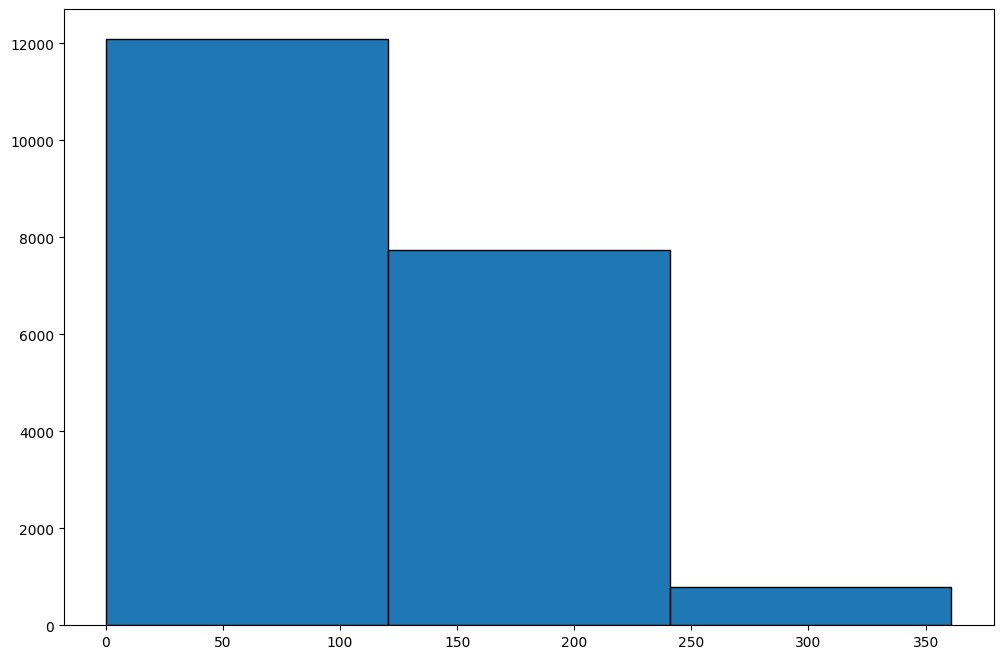

(array([12100.,  7735.,   796.]), array([  0.        , 120.33333333, 240.66666667, 361.        ]), <BarContainer object of 3 artists>)


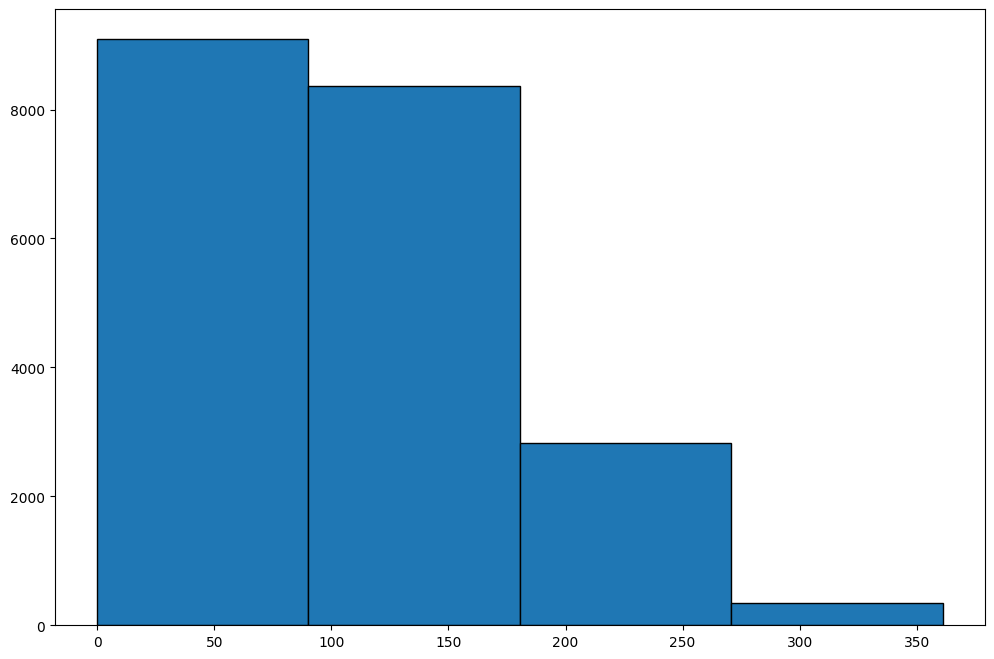

(array([9100., 8362., 2823.,  346.]), array([  0.  ,  90.25, 180.5 , 270.75, 361.  ]), <BarContainer object of 4 artists>)


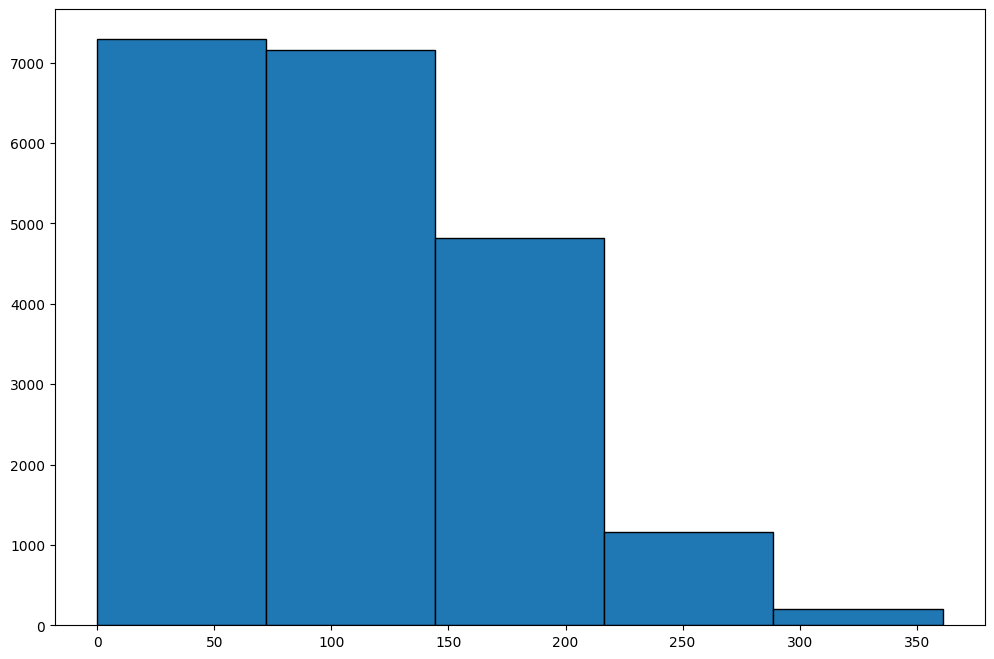

(array([7300., 7157., 4818., 1156.,  200.]), array([  0. ,  72.2, 144.4, 216.6, 288.8, 361. ]), <BarContainer object of 5 artists>)


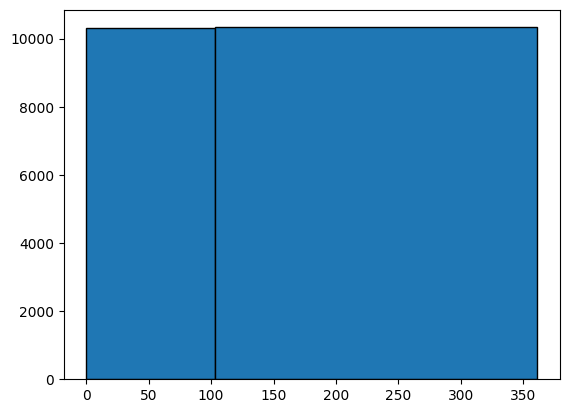

[  0. 103. 361.]


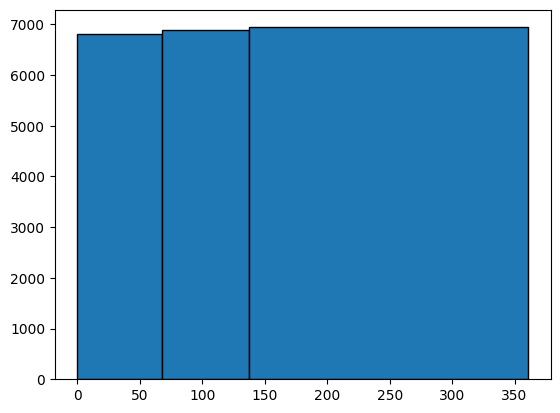

[  0.  68. 137. 361.]


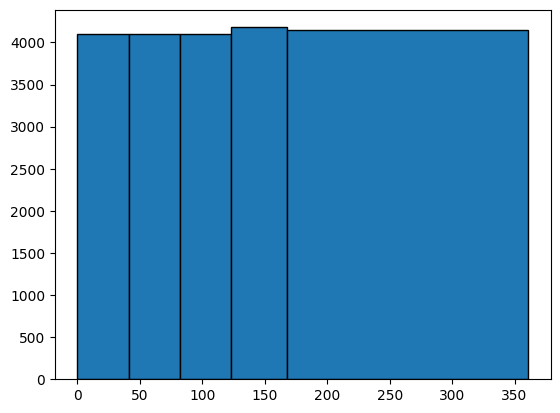

[  0.  41.  82. 123. 168. 361.]


In [ ]:

fig, mx = plt.subplots(figsize =(12, 8))

g = mx.hist(list(train_set['RUL']), bins = 3, edgecolor='black')

plt.show()
print(g)


fig, mx = plt.subplots(figsize =(12, 8))

g = mx.hist(list(train_set['RUL']), bins = 4, edgecolor='black')



plt.show()
print(g)



fig, mx = plt.subplots(figsize =(12, 8))
g = mx.hist(list(train_set['RUL']), bins = 5, edgecolor='black')


plt.show()
print(g)




l=len(list(train_set['RUL']))
k=l/4



def eql(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))


n, bins, patches = plt.hist(list(train_set['RUL']), eql(list(train_set['RUL']), 2), edgecolor='black')
plt.show()
print(bins)


def eql(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))


n, bins, patches = plt.hist(list(train_set['RUL']), eql(list(train_set['RUL']), 3), edgecolor='black')
plt.show()
print(bins)



def eql(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))


n, bins, patches = plt.hist(list(train_set['RUL']), eql(list(train_set['RUL']), 5), edgecolor='black')
plt.show()

print(bins)


# The sole purpose is to Visualize Remaining Usefull Life as between fixed and varying
# Bin and graphical representation

**Using BINNNING we are able to create classes of RUL and the ML pipeline can be created into classification Problemt**

In [ ]:
y = []
for k in df_tm['RUL']:
    if k<=70:
        y.append(1)
    elif k>70 and k<=140:
        y.append(2)
    else:
        y.append(3)

y = np.array(y)


X_train_mt_c, X_test_mt_c, y_train_mt_c, y_test_mt_c=train_test_split(df_tm.drop(columns=['Engine Id','RUL']), y, test_size=0.35, stratify=y)

X_train_mt_cs=scaler.fit_transform(X_train_mt_c)

X_test_mt_cs=scaler.fit_transform(X_test_mt_c)



# The role is to convert Regression ML Pipeline to a Classification One
# The above code converts the data into three categories Of Risky , Medium Risk and Safe No Risk


In [ ]:
label_map={1:"RISKY ZONE",2:"MEDIUM RISK",3:"SAFE NO RISK"}


y = []
for k in df_tm['RUL']:
    if k<=70:
        y.append(1)
    elif k>70 and k<=140:
        y.append(2)
    else:
        y.append(3)

y = np.array(y)


X_train_mt_c, X_test_mt_c, y_train_mt_c, y_test_mt_c=train_test_split(df_tm.drop(columns=['Engine Id','RUL']), y, test_size=0.35, stratify=y)

X_train_mt_cs=scaler.fit_transform(X_train_mt_c)

X_test_mt_cs=scaler.fit_transform(X_test_mt_c)

# The purpose of the Code is to Prepare the Data into Categories
# Based on Risk , Medium Risk and Safe No Risk


In [ ]:
def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true)))

# The sole purpose of the Code is to Check how far the numver of days is to RUL
# If RUL is 30 Days and the data is off by 20 Days then its very critical


In [ ]:

from sklearn.svm import SVC

classifier = SVC(kernel = 'linear',random_state = 2)

In [ ]:

from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=110)

In [ ]:
y_valid_cm=[]

for k in y_valid['RUL']:
    if k<=70:
        y_valid_cm.append(1)
    elif k>70 and k<=140:
        y_valid_cm.append(2)
    else:
        y_valid_cm.append(3)

y_valid_cm=np.array(y_valid_cm)

# Role is to convert the Remaining Useful Lifes into A well aranged
# set of Remaining Usefull life and varying RUL Value

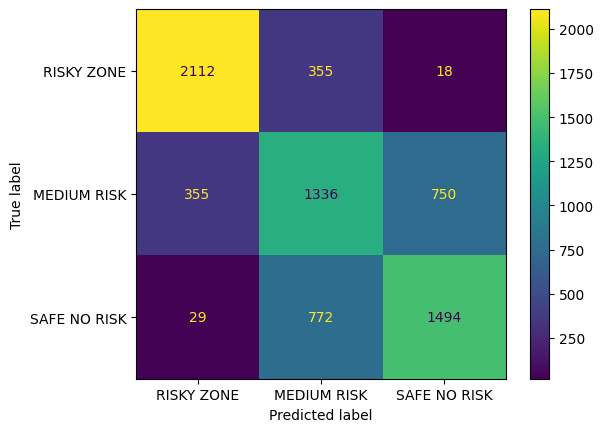

Support Vector Machine data is :
Accuracy score for training data is  0.687
Error rate for training data is 0.174
Accuracy score for test data is  0.684
Error rate for test data is  0.169
              precision    recall  f1-score   support

           1       0.85      0.85      0.85      2485
           2       0.54      0.55      0.54      2441
           3       0.66      0.65      0.66      2295

    accuracy                           0.68      7221
   macro avg       0.68      0.68      0.68      7221
weighted avg       0.68      0.68      0.68      7221



In [ ]:
# The purpose is to use SVM and predict RUL Categories
# WHile also evaluating its performance



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

classifier.fit(X_train_mt_cs,np.array(y_train_mt_c))
y_svc_train=classifier.predict(X_train_mt_cs)

y_svc_test=classifier.predict(X_test_mt_cs)


cm= confusion_matrix(y_test_mt_c, y_svc_test, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()

plt.show()



print('Support Vector Machine data is :')
print("Accuracy score for training data is  %.3f" %metrics.accuracy_score(y_train_mt_c, y_svc_train))

print("Error rate for training data is %.3f" %mean_absolute_error(y_train_mt_c,y_svc_train))

print("Accuracy score for test data is  %.3f" %metrics.accuracy_score(y_test_mt_c, y_svc_test))

print("Error rate for test data is  %.3f" %mean_absolute_error(y_test_mt_c,y_svc_test))

print(metrics.classification_report(y_test_mt_c,y_svc_test))

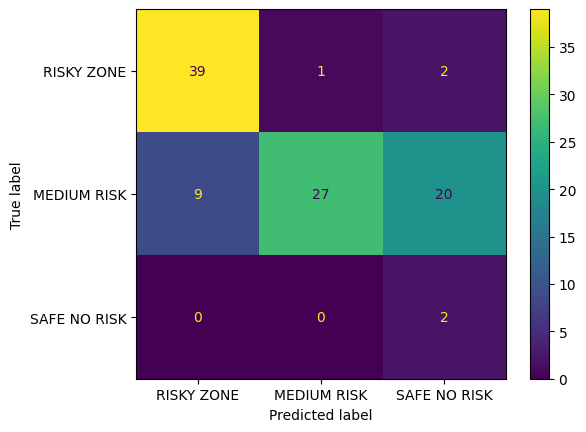

Support Vector Machine details is :
Accuracy score for validation data is  0.680
Error rate of validation data is  0.195


In [ ]:
# Support Vector Regression for Validation Test



y_supportvector_valid=classifier.predict(X_valid_s)
cm = confusion_matrix(y_valid_cm, y_supportvector_valid, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()

print('Support Vector Machine details is :')

print("Accuracy score for validation data is  %.3f" %metrics.accuracy_score(y_valid_cm,  y_supportvector_valid))

print("Error rate of validation data is  %.3f" %mean_absolute_error(y_valid_cm, y_supportvector_valid))


In [ ]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=6)

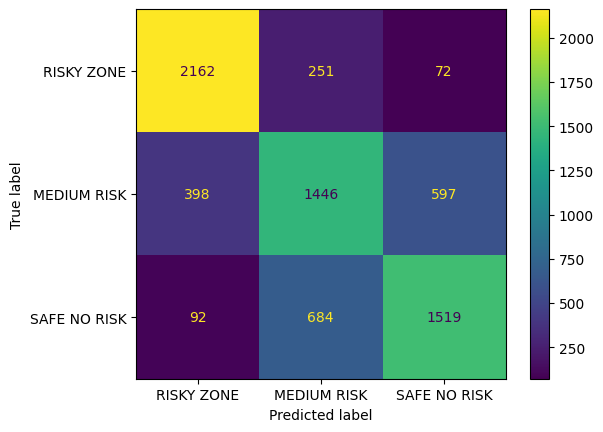

Random Forest Classifier Details is :
Accuracy score of test 0.981
Error rate of test 0.009
Accuracy score of test 0.710
Error rate of test 0.164
              precision    recall  f1-score   support

           1       0.82      0.87      0.84      2485
           2       0.61      0.59      0.60      2441
           3       0.69      0.66      0.68      2295

    accuracy                           0.71      7221
   macro avg       0.71      0.71      0.71      7221
weighted avg       0.71      0.71      0.71      7221



In [ ]:
# The purpose is to use Random Forest Classifier with data categorized
# Into Risk Categories



clf.fit(X_train_mt_cs,np.array(y_train_mt_c))

y_rfc_train=clf.predict(X_train_mt_cs)

y_rfc_test=clf.predict(X_test_mt_cs)

cm= confusion_matrix(y_test_mt_c, y_rfc_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])

disp.plot()

plt.show()


print('Random Forest Classifier Details is :')

print("Accuracy score of test %.3f" %metrics.accuracy_score(y_train_mt_c, y_rfc_train))

print("Error rate of test %.3f" %mean_absolute_error(y_train_mt_c,y_rfc_train))

print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_mt_c, y_rfc_test))

print("Error rate of test %.3f" %mean_absolute_error(y_test_mt_c,y_rfc_test))

print(metrics.classification_report(y_test_mt_c,y_rfc_test))

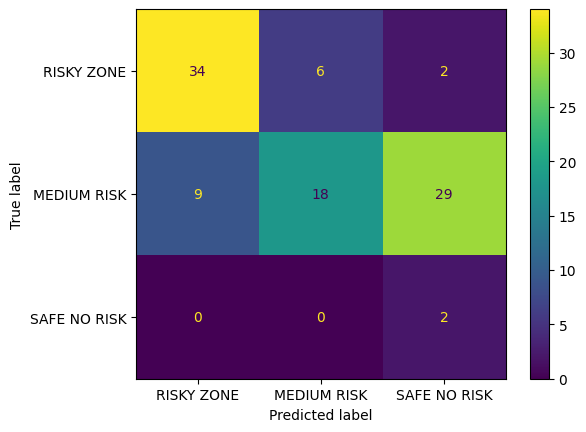

Random Forest Classifier data is :
Accuracy score of validation 0.540
Error rate of validation 0.290
              precision    recall  f1-score   support

           1       0.79      0.81      0.80        42
           2       0.75      0.32      0.45        56
           3       0.06      1.00      0.11         2

    accuracy                           0.54       100
   macro avg       0.53      0.71      0.45       100
weighted avg       0.75      0.54      0.59       100



In [ ]:
# Train Dataset with Random Forest Classifier using on a validation dataset



y_rfc_valid=clf.predict(X_valid_s)

cm= confusion_matrix(y_valid_cm, y_rfc_valid, labels=clf.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()

print('Random Forest Classifier data is :')

print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_cm, y_rfc_valid))

print("Error rate of validation %.3f" %mean_absolute_error(y_valid_cm,y_rfc_valid))

print(metrics.classification_report(y_valid_cm,y_rfc_valid))

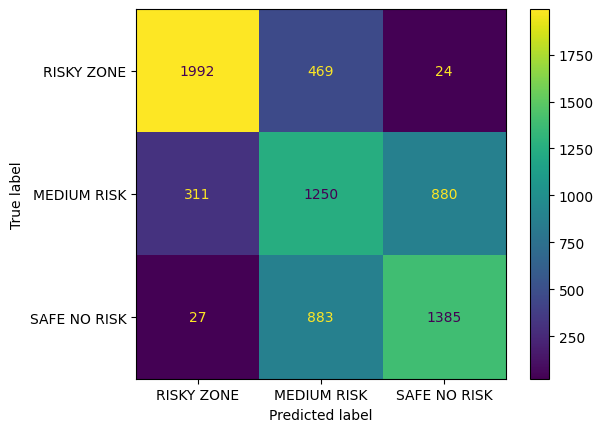

Guassian Naive Bayes Algorithm Result is :
Accuracy score for train data is  0.636
Error rate for train data is  0.202
Accuracy score for test data is  0.641
Error rate for test data is  0.197
              precision    recall  f1-score   support

           1       0.85      0.80      0.83      2485
           2       0.48      0.51      0.50      2441
           3       0.61      0.60      0.60      2295

    accuracy                           0.64      7221
   macro avg       0.65      0.64      0.64      7221
weighted avg       0.65      0.64      0.64      7221



In [ ]:
# Checking with GNB Classifier as further processing




from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_mt_cs,np.array(y_train_mt_c))

y_gnb_test= gnb.predict(X_test_mt_cs)
y_gnb_train= gnb.predict(X_train_mt_cs)


cm= confusion_matrix(y_test_mt_c, y_gnb_test, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()


print('Guassian Naive Bayes Algorithm Result is :')

print("Accuracy score for train data is  %.3f" %metrics.accuracy_score(y_train_mt_c, y_gnb_train))

print("Error rate for train data is  %.3f" %mean_absolute_error(y_train_mt_c,y_gnb_train))

print("Accuracy score for test data is  %.3f" %metrics.accuracy_score(y_test_mt_c, y_gnb_test))

print("Error rate for test data is  %.3f" %mean_absolute_error(y_test_mt_c,y_gnb_test))

print(metrics.classification_report(y_test_mt_c,y_gnb_test))

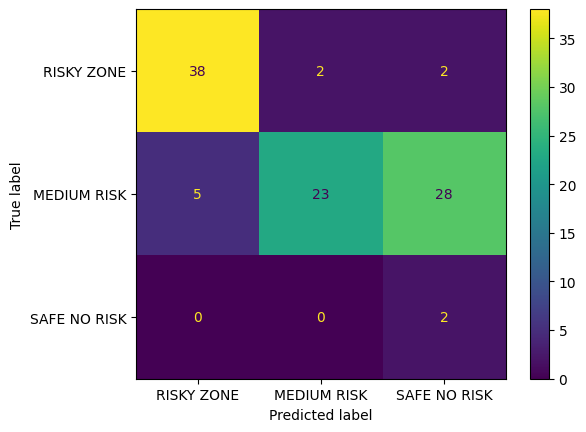

Random Forest Classifier Algorithm details is 
Accuracy score of validation technique is 0.630
Error rate of validation dataset is as follows  0.225
              precision    recall  f1-score   support

           1       0.88      0.90      0.89        42
           2       0.92      0.41      0.57        56
           3       0.06      1.00      0.12         2

    accuracy                           0.63       100
   macro avg       0.62      0.77      0.53       100
weighted avg       0.89      0.63      0.70       100



In [ ]:
# Using GNB application on a Validation Set




y_gnb_valid=gnb.predict(X_valid_s)
cm= confusion_matrix(y_valid_cm, y_gnb_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()

print('Random Forest Classifier Algorithm details is ')

print("Accuracy score of validation technique is %.3f" %metrics.accuracy_score(y_valid_cm, y_gnb_valid))

print("Error rate of validation dataset is as follows  %.3f" %mean_absolute_error(y_valid_cm,y_gnb_valid))

print(metrics.classification_report(y_valid_cm,y_gnb_valid))

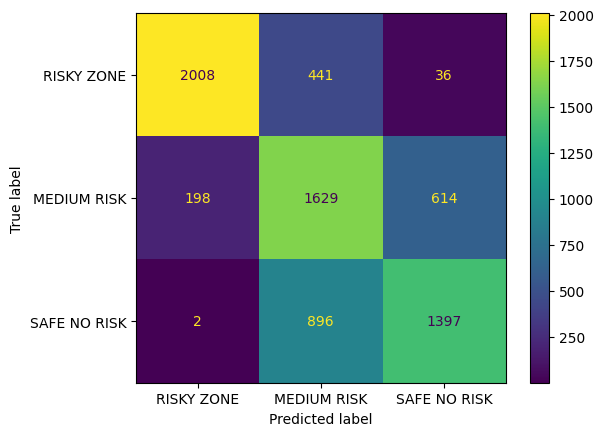

K - Nearest Neighbour Details is as follwos :
Accuracy score for train data is  0.718
Error rate for  train data is as  0.166
Accuracy score of test data is as follows 0.697
Error rate of test data is as follows  0.169
              precision    recall  f1-score   support

           1       0.91      0.81      0.86      2485
           2       0.55      0.67      0.60      2441
           3       0.68      0.61      0.64      2295

    accuracy                           0.70      7221
   macro avg       0.71      0.69      0.70      7221
weighted avg       0.72      0.70      0.70      7221



In [ ]:
# Using KNN Model and comparing with SVm and Random forest and GNB


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_mt_cs,np.array(y_train_mt_c))

y_knn_test= knn.predict(X_test_mt_cs)
y_knn_train= knn.predict(X_train_mt_cs)

cm= confusion_matrix(y_test_mt_c, y_knn_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()

print('K - Nearest Neighbour Details is as follwos :')

print("Accuracy score for train data is  %.3f" %metrics.accuracy_score(y_train_mt_c, y_knn_train))

print("Error rate for  train data is as  %.3f" %mean_absolute_error(y_train_mt_c,y_knn_train))

print("Accuracy score of test data is as follows %.3f" %metrics.accuracy_score(y_test_mt_c, y_knn_test))

print("Error rate of test data is as follows  %.3f" %mean_absolute_error(y_test_mt_c,y_knn_test))

print(metrics.classification_report(y_test_mt_c,y_knn_test))

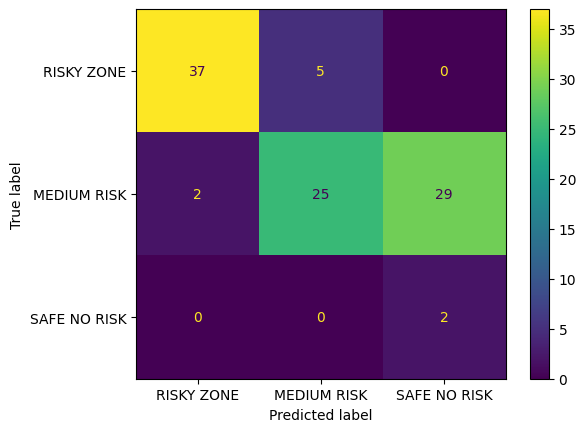

K - Nearest Neigbhor details is as follows 
Error rate of validation set is as follows  0.205
Accuracy score of validation set is as follows  0.640
              precision    recall  f1-score   support

           1       0.95      0.88      0.91        42
           2       0.83      0.45      0.58        56
           3       0.06      1.00      0.12         2

    accuracy                           0.64       100
   macro avg       0.62      0.78      0.54       100
weighted avg       0.87      0.64      0.71       100



In [ ]:
# Using KNN application on a validation set

y_knn_valid=knn.predict(X_valid_s)

cm= confusion_matrix(y_valid_cm, y_knn_valid, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()

print('K - Nearest Neigbhor details is as follows ')

print("Error rate of validation set is as follows  %.3f" %mean_absolute_error(y_valid_cm,y_knn_valid))

print("Accuracy score of validation set is as follows  %.3f" %metrics.accuracy_score(y_valid_cm, y_knn_valid))

print(metrics.classification_report(y_valid_cm,y_knn_valid))

In [ ]:
# Classifying RUL into Various categories

def transform_to_classes(d):
    y=[]
    for k in d:
        if k<=70:
            y.append(1)
        elif k>70 and k<=140:
            y.append(2)
        else:
            y.append(3)
    return y

Index for train :  [    0     1     2 ... 20625 20628 20630] 

Index for test :  [    7    13    17 ... 20626 20627 20629]


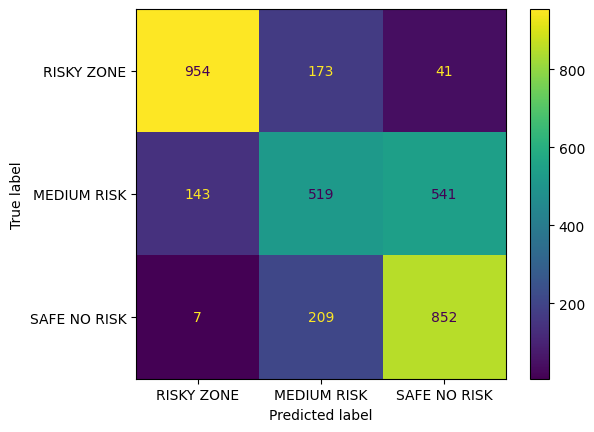

Support Vector Machine is afollows : 
Accuracy score of training set is as follwos  0.689
Error rate of training set is as follows  0.173
Error rate of test sdore is as follows  0.195
Accuracy score of testdata is as follows  0.676
              precision    recall  f1-score   support

           1       0.86      0.82      0.84      1168
           2       0.58      0.43      0.49      1203
           3       0.59      0.80      0.68      1068

    accuracy                           0.68      3439
   macro avg       0.68      0.68      0.67      3439
weighted avg       0.68      0.68      0.67      3439

Index for train :  [    0     1     2 ... 20627 20629 20630] 

Index for test :  [    5     6    10 ... 20595 20605 20628]


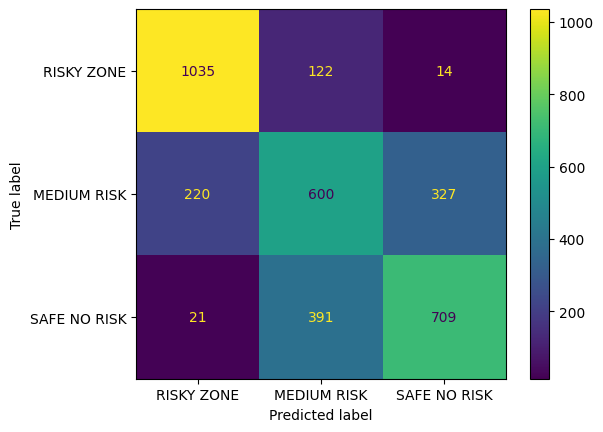

Support Vector Machine is afollows : 
Accuracy score of training set is as follwos  0.685
Error rate of training set is as follows  0.174
Error rate of test sdore is as follows  0.165
Accuracy score of testdata is as follows  0.682
              precision    recall  f1-score   support

           1       0.81      0.88      0.85      1171
           2       0.54      0.52      0.53      1147
           3       0.68      0.63      0.65      1121

    accuracy                           0.68      3439
   macro avg       0.68      0.68      0.68      3439
weighted avg       0.68      0.68      0.68      3439

Index for train :  [    2     4     5 ... 20628 20629 20630] 

Index for test :  [    0     1     3 ... 20619 20621 20622]


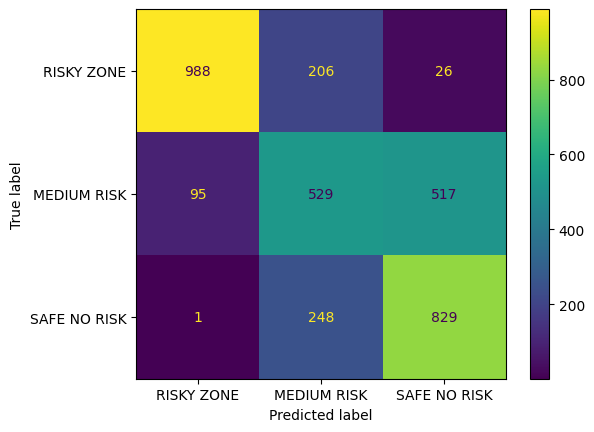

Support Vector Machine is afollows : 
Accuracy score of training set is as follwos  0.689
Error rate of training set is as follows  0.173
Error rate of test sdore is as follows  0.188
Accuracy score of testdata is as follows  0.682
              precision    recall  f1-score   support

           1       0.91      0.81      0.86      1220
           2       0.54      0.46      0.50      1141
           3       0.60      0.77      0.68      1078

    accuracy                           0.68      3439
   macro avg       0.68      0.68      0.68      3439
weighted avg       0.69      0.68      0.68      3439

Index for train :  [    0     1     3 ... 20628 20629 20630] 

Index for test :  [    2     9    15 ... 20611 20615 20624]


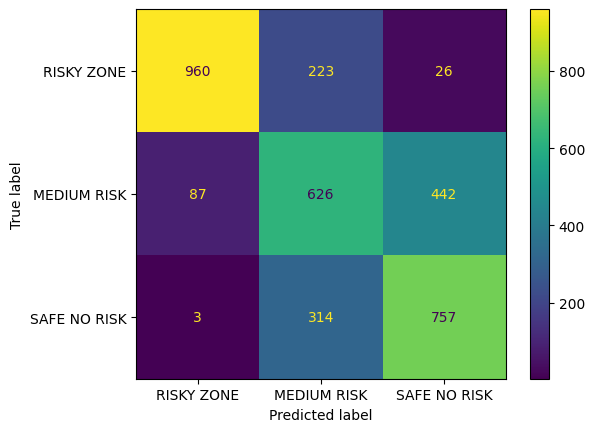

Support Vector Machine is afollows : 
Accuracy score of training set is as follwos  0.689
Error rate of training set is as follows  0.173
Error rate of test sdore is as follows  0.188
Accuracy score of testdata is as follows  0.682
              precision    recall  f1-score   support

           1       0.91      0.79      0.85      1209
           2       0.54      0.54      0.54      1155
           3       0.62      0.70      0.66      1074

    accuracy                           0.68      3438
   macro avg       0.69      0.68      0.68      3438
weighted avg       0.70      0.68      0.69      3438

Index for train :  [    0     1     2 ... 20628 20629 20630] 

Index for test :  [    4     8    14 ... 20600 20601 20625]


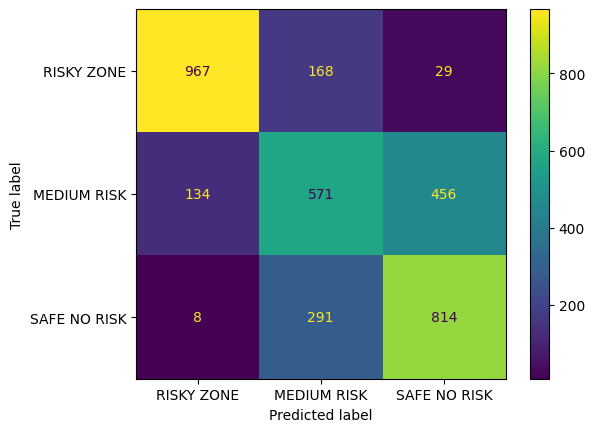

Support Vector Machine is afollows : 
Accuracy score of training set is as follwos  0.687
Error rate of training set is as follows  0.174
Error rate of test sdore is as follows  0.181
Accuracy score of testdata is as follows  0.684
              precision    recall  f1-score   support

           1       0.87      0.83      0.85      1164
           2       0.55      0.49      0.52      1161
           3       0.63      0.73      0.67      1113

    accuracy                           0.68      3438
   macro avg       0.68      0.68      0.68      3438
weighted avg       0.69      0.68      0.68      3438

Index for train :  [    0     1     2 ... 20627 20628 20629] 

Index for test :  [   19    37    38 ... 20618 20623 20630]


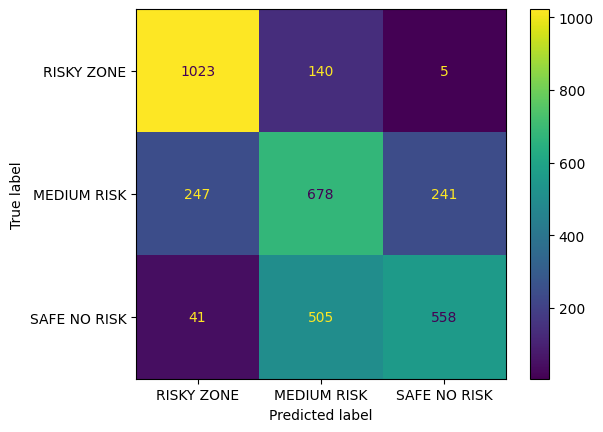

Support Vector Machine is afollows : 
Accuracy score of training set is as follwos  0.687
Error rate of training set is as follows  0.174
Error rate of test sdore is as follows  0.172
Accuracy score of testdata is as follows  0.657
              precision    recall  f1-score   support

           1       0.78      0.88      0.83      1168
           2       0.51      0.58      0.54      1166
           3       0.69      0.51      0.58      1104

    accuracy                           0.66      3438
   macro avg       0.66      0.65      0.65      3438
weighted avg       0.66      0.66      0.65      3438



In [ ]:
# The role of K Fold Cross Validation is to to work with SVM
# Data is devided int multiple K folds



from sklearn.model_selection import KFold


train_tm_cv=df_tm.drop(columns=['Engine Id','RUL']).copy()
y = df_tm['RUL']
cv = KFold(n_splits=6, shuffle=True)
for train_indx, test_indx in cv.split(train_tm) :
    print("Index for train : ", train_indx, "\n")
    print("Index for test : ", test_indx)
    X_train, X_test, y_train, y_test = train_tm_cv.iloc[train_indx,:], train_tm_cv.iloc[test_indx,:],np.array(transform_to_classes(y[train_indx])), np.array(transform_to_classes(y[test_indx]))
    classifier.fit(scaler.fit_transform(X_train), y_train)
    y_svc_train=classifier.predict(scaler.fit_transform(X_train))

    y_svc_test=classifier.predict(scaler.fit_transform(X_test))


    cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
    disp.plot()
    plt.show()



    print('Support Vector Machine is afollows : ')
    print("Accuracy score of training set is as follwos  %.3f" %metrics.accuracy_score (y_train, y_svc_train))

    print("Error rate of training set is as follows  %.3f" %mean_absolute_error(y_train,y_svc_train))

    print("Error rate of test sdore is as follows  %.3f" %mean_absolute_error(y_test,y_svc_test))

    print("Accuracy score of testdata is as follows  %.3f" %metrics.accuracy_score(y_test, y_svc_test))

    print(metrics.classification_report(y_test,y_svc_test))

**Discussion And Conclusion**

**Discussion**

- 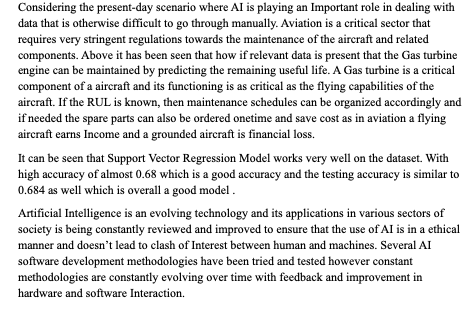





**Conclusion**

- 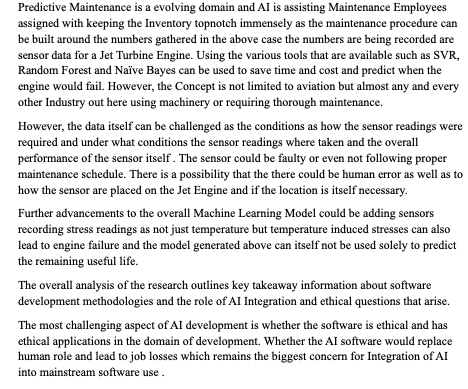


Refer to The Thesis Document for Further Understanding of the Model



